In [252]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [253]:
data_url = './train.csv' 
data = pd.read_csv(data_url) 
data 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
Y_data = data['label'] 
X_data = data.drop('label', axis = 1) 

In [255]:
Y_data = np.array(Y_data) 
X_data = np.array(X_data) 
print(f'Examples X: {X_data.shape[0]},Pixels per Example X: {X_data.shape[1]}, Lables Y: {Y_data.shape[0]}') 

Examples X: 42000,Pixels per Example X: 784, Lables Y: 42000


In [256]:
num_val = 1000 

In [257]:
X_val = X_data[:num_val] 
Y_val = Y_data[:num_val] 
X_val = X_val / 255 

In [258]:
X_train = X_data[num_val:].T 
Y_train = Y_data[num_val:] 
X_train = X_train / 255 

In [259]:
print('Val: ', X_val.shape, Y_val.shape) 
print('Train: ', X_train.shape, Y_train.shape) 

Val:  (1000, 784) (1000,)
Train:  (784, 41000) (41000,)


In [260]:
def initialize_parameters(input_size, hidden_size, output_size): 
    std_dev = np.sqrt(2 / input_size) 
 
    W1 = np.random.randn(hidden_size, input_size) * std_dev 
    b1 = np.zeros((hidden_size, 1)) 
    W2 = np.random.randn(output_size, hidden_size) * std_dev 
    b2 = np.zeros((output_size, 1)) 
    return W1, b1, W2, b2 

In [261]:
def softmax(Z): 
    return np.exp(Z) / sum(np.exp(Z)) 

In [262]:
def forward_propagation(X, W1, b1, W2, b2):
    print('Weights: ', W1.shape, 'Inputs: ', X.shape)
    Z1 = np.dot(W1, X) + b1 
    A1 = np.maximum(Z1, 0) 
    Z2 = np.dot(W2, A1) + b2 
    A2 = softmax(Z2) 
    return Z1, A1, Z2, A2 

In [263]:
def one_hot_encoder(Y, num_classes): 
    num_samples = len(Y) 
    one_hot_Y = np.zeros((num_samples, num_classes)) 
    one_hot_Y[np.arange(num_samples), Y] = 1 
    return one_hot_Y.T 

In [264]:
def backward_propagation(X, Y, Z1, A1, Z2, A2, W2): 
    m = X.shape[1] 
    one_hot_Y = one_hot_encoder(Y, A2.shape[0]) 
 
    dZ2 = A2 - one_hot_Y 
    dW2 = 1 / m * np.dot(dZ2, A1.T) 
    db2 = 1 / m * np.sum(dZ2) 
 
    dZ1 = np.dot(W2.T, dZ2) * (Z1 > 0) 
    dW1 = 1 / m * np.dot(dZ1, X.T) 
    db1 = 1 / m * np.sum(dZ1) 
 
    return dW1, db1, dW2, db2 

In [265]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate): 
    W1 -= learning_rate * dW1 
    b1 -= learning_rate * db1 
    W2 -= learning_rate * dW2 
    b2 -= learning_rate * db2 
    return W1, b1, W2, b2 

In [266]:
def get_predictions(A2): 
    return np.argmax(A2, 0) 

In [267]:
def get_accuracy(prediction, Y): 
    accuracy = np.sum(prediction == Y) / Y.size 
 
    return accuracy 

In [268]:
def gradient_descent(X, Y, input_size, hidden_size, output_size, learning_rate, iterations): 
    history = { 
        'accuracy': [] 
    } 
     
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size) 
 
    for i in range(iterations): 
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2) 
         
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W2) 
         
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate) 
         
        if i % 10 == 0: 
            prediction = get_predictions(A2) 
            accuracy = get_accuracy(prediction, Y) 
 
            print(f'Iteration {i}, Accuracy: {accuracy}') 
            history['accuracy'].append(accuracy) 
             
    return W1, b1, W2, b2, history 

In [269]:
input_size = 784 
hidden_size = 10 
output_size = 10 
learning_rate = 0.1 
iterations = 500 

In [270]:
W1, b1, W2, b2, history = gradient_descent(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, iterations) 

Weights:  (10, 784) Inputs:  (784, 41000)
Iteration 0, Accuracy: 0.09921951219512196
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)


Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Iteration 10, Accuracy: 0.1881951219512195
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Iteration 20, Accuracy: 0.2360731707317073
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (784, 41000)
Weights:  (10, 784) Inputs:  (78

<Axes: title={'center': 'Training  Accuracy'}>

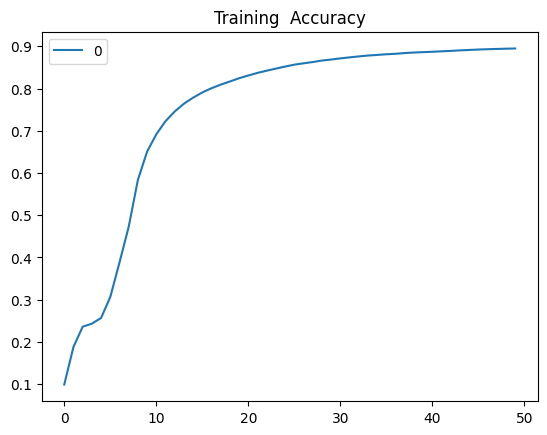

In [271]:
pd.DataFrame(history['accuracy']).plot(title='Training  Accuracy') 

In [272]:
def predict(X, W1, b1, W2, b2): 
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2) 
    predictions = get_predictions(A2) 
    return predictions 

In [273]:
def val_predict_image(X, Y, index, W1, b1, W2, b2): 
    image_pixels = X.T[:, index, None]
    print(f'Image pixels at index {index} ', image_pixels.shape)
    print( X.shape, X.T.shape)
    prediction = predict(image_pixels, W1, b1, W2, b2) 
 
    label = Y[index] 
    print("Prediction: ", prediction) 
    print("Label: ", label) 
 
    image_pixels = image_pixels.reshape((28, 28)) * 255 
    plt.gray() 
    plt.imshow(image_pixels, interpolation='nearest') 
    plt.show() 

Image pixels at index 1  (784, 1)
(1000, 784) (784, 1000)
Weights:  (10, 784) Inputs:  (784, 1)
Prediction:  [0]
Label:  0


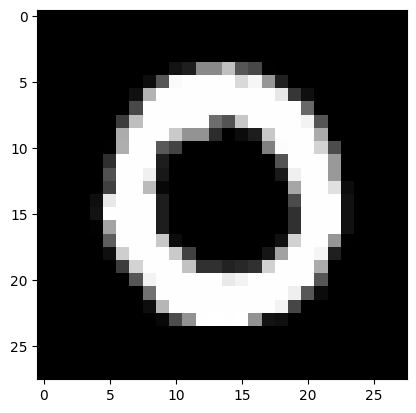

Image pixels at index 6  (784, 1)
(1000, 784) (784, 1000)
Weights:  (10, 784) Inputs:  (784, 1)
Prediction:  [7]
Label:  7


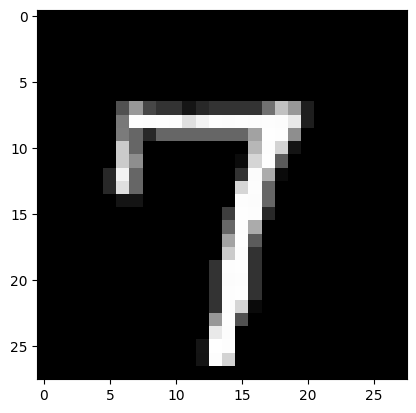

Image pixels at index 11  (784, 1)
(1000, 784) (784, 1000)
Weights:  (10, 784) Inputs:  (784, 1)
Prediction:  [9]
Label:  9


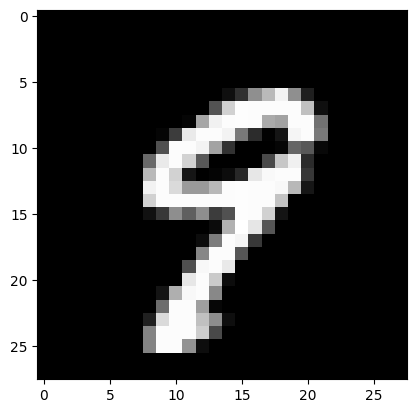

Image pixels at index 200  (784, 1)
(1000, 784) (784, 1000)
Weights:  (10, 784) Inputs:  (784, 1)
Prediction:  [0]
Label:  0


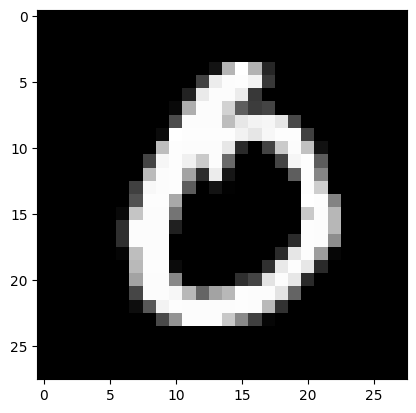

In [274]:
val_predict_image(X_val, Y_val, 1, W1, b1, W2, b2)
val_predict_image(X_val, Y_val, 6, W1, b1, W2, b2)
val_predict_image(X_val, Y_val, 11, W1, b1, W2, b2)
val_predict_image(X_val, Y_val, 200, W1, b1, W2, b2)

In [275]:
predictions = predict(X_val.T, W1, b1, W2, b2)
get_accuracy(predictions, Y_val)

Weights:  (10, 784) Inputs:  (784, 1000)


0.901

In [276]:
data_path = './test.csv'
X_test = pd.read_csv(data_path)
X_test = np.array(X_test).T
X_test = X_test / 255
print(X_test.shape)

(784, 28000)


In [277]:
predictions = predict(X_test, W1, b1, W2, b2)
predictions.shape

Weights:  (10, 784) Inputs:  (784, 28000)


(28000,)

In [278]:
data_path = './sample_submission.csv'
sample_submission = pd.read_csv(data_path)
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [279]:
sample_submission['Label'] = predictions
sample_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2


In [280]:
sample_submission.to_csv('submission.csv', index = False)